<a href="https://colab.research.google.com/github/ethamCS/Juypter-public-/blob/main/module01_02_labeled_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur with updates by Ross Beveridge.*

Last update 11/18/2021 by Ross Beveridge

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Pattern classification

### Labeled data

A labeled dataset is a collection of feature vectors and their associated labels.  To demonstrate this concept, we will load the **iris dataset**.
This is a famous dataset collected by statistician and biologist Ronald Fisher in 1936. 
This dataset even has its own [wikipedia page](https://en.wikipedia.org/wiki/Iris_flower_data_set).

The data contains measurments that describe three types of iris flowers:
0) Iris setosa, 1) Iris virginica, and 2) Iris versicolor:

<img style="padding: 10px; float:left;" alt="Iris setosa in public domain" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Iris_setosa.JPG" width="150">
<img style="padding: 10px; float:left;" alt="Iris versicolor Danielle Langlois CC BY-SA 3.0" src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" width="150">
<img style="padding: 10px; float:left;" alt="Iris virginica by Frank Mayfield CC BY-SA 2.0" src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg" width="150">



### Importing data

Once upon a time just getting access to common data sets took effort. No longer, there are several common packages to aid people seeking to better understand machine learning.  One we will utlize throughout this semster is [sklearn](https://scikit-learn.org/stable/)

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape, y.shape)

(150, 4) (150,)


In [ ]:
print (X[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

We can also obtain the names of the features:

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
print(y[:5])

[0 0 0 0 0]


The class labels are mapped to integers, and we can obtain the original class names:

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### A first taste of ploting data

Python is rich with options for exploring data visually.  To start, we will consider [Seaborn](https://seaborn.pydata.org/index.html) which is built atop numpy, scipy, pandas and matplotlib. For now pay attention to the manner data is easily summarized and displayed. Including, because color matters, the use of a color [palette](https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=color%20palette) to readily distinguish between different classes of data. 

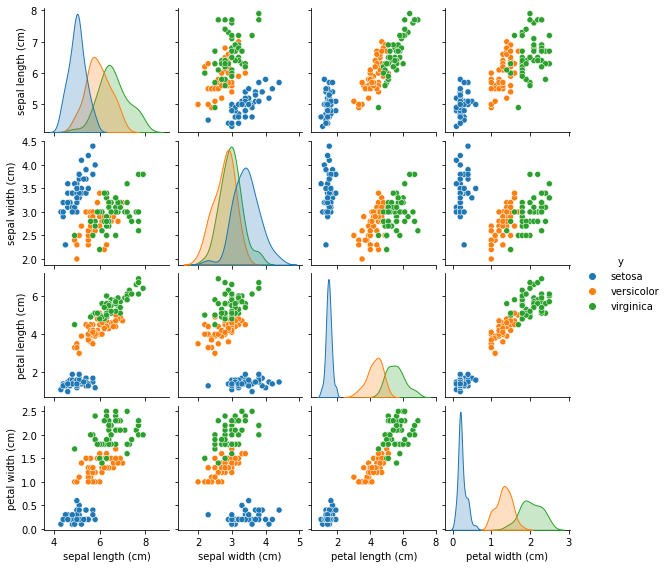

In [ ]:
import seaborn as sns
import pandas as pd
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['y'] = np.array([iris.target_names[i] for i in iris.target])
iris_pal = sns.color_palette("tab10",3)
sns.pairplot(iris_df, hue='y', height=2.0, palette=iris_pal)

#### Reflection:

* Does the data seem to be useful for the classification task of distinguishing between iris species?
* Which features are most informative?  Are petal measurments more relevant than information on sepal leaves?

Let us now define a *labeled dataset* more formally as a collection of *labeled examples*.

$$
\mathcal{D} = \{ \;(\mathbf{x}_i, y_i) \; \}_{i=1}^N.
$$

$\mathbf{x}_i \in \mathbb{R}^d$ is the *feature vector* and $y_i$ is the label associated with $\mathbf{x}_i$.

Recall that $\mathbb{R}^d$ is the set of all $d$-dimensional vectors with entries that are real numbers.

Using mathematical nomenclature, it is a [cartesian product](https://en.wikipedia.org/wiki/Cartesian_product), and more specifically, a cartesian power of the real numbers.  The font used to represent the set of real numbers, $\mathbb{R}$ is called [blackboard bold](https://en.wikipedia.org/wiki/Blackboard_bold).

For *classification problems* the labels are a discrete set, e.g. $\{0, 1 \}$ for a binary classification problem.
For *regression problems* the labels are continuous.

#### Exercise

* Give an example of a classification problem.
* Give an example of a regression problem.

As we saw above, we will represent the collection of feature vectors as a matrix $X$, where row $i$ of $X$ is equal to $\mathbf{x}_i$.  In other words $X$ is an $N \times d$ matrix.


**Objective**:  train a classifier that will accurately predict the class label $y$ of an object given features $\mathbf{x}$ that characterize it.

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, 
                          n_classes=2, n_clusters_per_class=1, 
                          class_sep=0.4, random_state=1)

Note the use of a handy capability supplied by the sklearn package: [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

Now let us see what we have constructed.

In [ ]:
X.shape, y.shape

((100, 2), (100,))

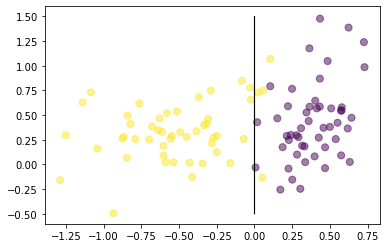

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=50);
plt.arrow(0,-0.5,0,2, width=0.001, length_includes_head=True, 
          alpha=1,linestyle='-',color='k');

You will start to see a trend here, it is never too early to get control of how your data visualizations appear. So let us go a bit further and consider transparency and color.  This will involve a looking more closely at [scatterplot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html), a bit more about [color maps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) and also [alpha blending](https://en.wikipedia.org/wiki/Alpha_compositing).  

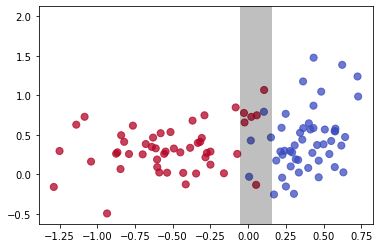

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float), 
            alpha=0.75, s=50, cmap='coolwarm');
plt.plot([0.05, 0.05], [-0.5, 2], linewidth=32,
          alpha=0.25, linestyle='-',color='k');

### What might we conclude ?

Looking at this data, we might conclude that a good classification rule would be based on the value of the first feature, and whether it is larger than some threshold (say 0).  However:

* This threshold was chosen on a specific dataset.  How well do we expect it to perform on new data?
* How to algorithmically decide on a rule that is expected to perform well?

This is exactly what we will do in this course:  *design algorithms that generalize well to unseen data, and determine how close we are to this goal*.

### Machine learning problems

In this course we will address the following forms of learning problems:

<img style="padding: 10px; float:right;" alt="linear regression in public domain" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="250">

* Classification:  discrete/categorical labels
* Regression:  continuous labels
* Clustering:  no labels 

Classification and regression are forms of *supervised learning*, where we learn to predict a desired output on the basis of labeled examples.
Clustering is an example of *unsupervised learning*.  Unsupervised learning is often a preliminary step before applying supervised learning, where we create an internal representation of the input e.g. form clusters; extract features etc.


### What kinds of problems are amenable for a machine learning solution?

Which of the following problems are suited for machine learning?

* Classifying numbers into primes and non-primes. 
* Predicting the time it would take a falling object to hit the ground. 
* Determining the optimal cycle for traffic lights in a busy intersection. 
* Medical diagnosis


### Formulating classification problems

When trying to address a classification problem we basically exploring and hoping to discover and exploit relationships between feature vectors and their labels.  As machine learning engineers, one of our tasks is to decide what information to collect for our feature vectors.  The better the features we collect, the better the resulting accuracy!

As an example let's consider the problem of deciding on whether to approve an applicant for credit or a loan.  What features would you collect?


*Features for the credit approval problem:*

* Age
* ...